<a href="https://colab.research.google.com/github/priscilla1812/Employee-Attrition-Analysis-Performance-Insights/blob/main/Employee_Attrition_Analysis_%26_Performance_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBM HR Analytics Employee Attrition Analysis & Performance Insights

**What is Employee Attrition?**

Employee attrition is a reduction in the overall number of employees within an organization that occurs when individuals leave their positions through voluntary departures (like resignations or retirement) or involuntary means (such as layoffs or terminations), and the resulting vacancies are not filled by new hires.

**Problem Statement**:

Employee attrition poses a significant challenge for organizations, leading to increased recruitment costs, loss of experienced staff, and disruption in team productivity. Identifying the key factors that influence why employees leave is essential for Human Resource (HR) departments to develop effective retention strategies.

This project aims to analyze the IBM HR Analytics Employee Attrition & Performance dataset to uncover insights into the underlying causes of employee attrition. By leveraging data analytics techniques, we will explore trends related to demographics, job roles, compensation, satisfaction levels, and work environment. The ultimate goal is to support data-driven HR decisions that can reduce attrition and improve employee retention.

**Key Questions to Answer:**

1. What is the overall attrition rate in the company?

2. Which job roles and departments have the highest attrition?

3. Is there a correlation between overtime and attrition?

4. Does job satisfaction or work-life balance influence attrition?

5. How do income, education, and experience affect attrition?

*Dataset Description*:

The IBM HR Analytics Employee Attrition & Performance dataset contains information about employees from a fictional company. The dataset is widely used in HR analytics projects, especially for predictive modeling and exploratory data analysis.

*Columns Description*:

**Age**: Age of the employee

**Attrition**: Target variable indicating if an employee left (Yes) or stayed (No)

**BusinessTravel**: Frequency of business travel (e.g., Travel_Rarely, Travel_Frequently)

**DailyRate**: Daily wage rate

**Department**: Department of the employee (Sales, R&D, HR)

**DistanceFromHome**: Distance between home and work (in km)

**Education**: Education level (1 = Below College, 5 = Doctor)

**EducationField**: Field of education (e.g., Life Sciences, Medical, Marketing)

**EmployeeCount**: Always 1

**EmployeeNumber**: Unique ID for each employee

**EnvironmentSatisfaction**: Satisfaction with workplace environment (1–4)

**Gender**: Gender of the employee

**HourlyRate**: Hourly wage

**JobInvolvement**: Level of involvement in the job (1–4)

**JobLevel**: Seniority level within the company

**JobRole**: Role (e.g., Sales Executive, Manager, Research Scientist)

**JobSatisfaction**: Job satisfaction level (1–4)

**MaritalStatus**: Marital status (Single, Married, Divorced)

**MonthlyIncome**: Gross monthly income

**MonthlyRate**: Monthly rate

**NumCompaniesWorked**: Number of previous employers

**Over18**: Adult or not (Y/N)

**OverTime**: Whether the employee works overtime (Yes/No)

**PercentSalaryHike**: Percentage salary increase

**PerformanceRating**: Performance score (mostly 3 or 4)

**RelationshipSatisfaction**: Satisfaction with coworkers (1–4)

**StandardHours**:	Always 80

**StockOptionLevel**: Stock options granted

**TotalWorkingYears**: Total years of professional experience

**TrainingTimesLastYear**:	Number of trainings attended last year

**WorkLifeBalance**:	Work-life balance rating (1–4)

**YearsAtCompany**:	No. of Years spent in the company

**YearsInCurrentRole**:  No. of Years in current job role

**YearsSinceLastPromotion**: No. of Years since last promotion

**YearsWithCurrManager**: No. of Years working with the current manager

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [ ]:
# Import the dataset
df = pd.read_csv("IBM_HR_Analytics_Dataset.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data Preprocessing

In [ ]:
# Number of rows and columns in the dataset
print("Rows and Columns:", df.shape)

Rows and Columns: (1470, 35)


In [ ]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Descriptive statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


*   **Age of employee**: minimum is 18 years old and maximum is 60 years old.
*   **Daily rate of employee**: minimum is 102 dollars per day and maximum is 1499 dollars per day.
*   **Hourly rate of employee**: minimum is 30 dollars per hour and maximum is 100 dollars per hour.
*   **TotalWorkingYears of employee**: minimum professional experience is 0-1 years and maximum is 40 years.
*   **YearsAtCompany** (min 0, max 40 years), **YearsInCurrentRole** (max 18 years), **YearsSinceLastPromotion** (max 15 years),	**YearsWithCurrManager** (max 17 years)





In [ ]:
# Check for missing values
print("Missing Values:", df.isnull().values.any())

Missing Values: False


In [ ]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

No missing values and duplicate values

In [ ]:
# Print the count of attrition in the dataset
print("Count", df['Attrition'].value_counts())
print()
# Print the percent of attrition in the dataset
print("Percent", df['Attrition'].value_counts(normalize=True) * 100)

Count Attrition
No     1233
Yes     237
Name: count, dtype: int64

Percent Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [ ]:
# check range of scores
ordinal_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction',
                'WorkLifeBalance', 'JobLevel', 'JobInvolvement','PerformanceRating', 'StockOptionLevel']

for col in ordinal_cols:
    print(f"{col} unique values:", df[col].unique())
    print()

JobSatisfaction unique values: [4 2 3 1]

EnvironmentSatisfaction unique values: [2 3 4 1]

RelationshipSatisfaction unique values: [1 4 2 3]

WorkLifeBalance unique values: [1 3 2 4]

JobLevel unique values: [2 1 3 4 5]

JobInvolvement unique values: [3 2 4 1]

PerformanceRating unique values: [3 4]

StockOptionLevel unique values: [0 1 3 2]



In [ ]:
# Check for duplicated categories
df['Department'].value_counts()        # can be used to spot misspelled or duplicate labels.

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


## Feature Engineering

### Feature Reduction / Cleanup

'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. These features are not useful for analysis.

**MonthlyRate**, **DailyRate**, **HourlyRate** = HR system rate assigned to role (not equal to actual income).

MonthlyRate, HourlyRate, DailyRate are dropped because they are random ranges generated independently, inconsistent, and not useful for attrition-related analytics.

In [ ]:
# Drop Unnecessary Columns
df.drop(['EmployeeNumber','EmployeeCount', 'Over18', 'StandardHours',
         'MonthlyRate', 'DailyRate', 'HourlyRate'], axis=1, inplace=True)

### Encoding Categorical Variables

In [ ]:
# Categorical Columns
cat_cols = df.select_dtypes(include='object').columns
# Convert string-based categorical columns
for col in cat_cols:
    df[col] = df[col].astype('category')

In [ ]:
# Convert numeric-ordinal columns to category
for col in ordinal_cols:
    df[col] = df[col].astype('category')

### Create New Grouped Columns for Data Visualization

In [ ]:
# Age Group
# Group continuous Age values into age ranges
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[df['Age'].min(), 25, 35, 45, 55, df['Age'].max()],
                        labels=['18–25', '26–35', '36–45', '46–55', '56+'])

In [ ]:
# Years at Company Group
# Group employees based on tenure
df['YearsAtCompanyGroup'] = pd.cut(df['YearsAtCompany'], bins=[-1, 2, 5, 10, 40],
                                   labels=['0–2', '3–5', '6–10', '10+'])

# Bins are also known as classes, buckets, or intervals and
# help simplify and visualize the distribution of large datasets by grouping values into manageable segments.

In [ ]:
# Income Group
# Categorize income into Low/Medium/High
df['IncomeGroup'] = pd.cut(df['MonthlyIncome'],
                           bins=[df['MonthlyIncome'].min(), 3000, 7000, df['MonthlyIncome'].max()],
                           labels=['Low', 'Medium', 'High'])

In [ ]:
# Salary Hike Group
# Categorize percentage salary hike into Low/Moderate/High
df['SalaryHikeGroup'] = pd.cut(df['PercentSalaryHike'], bins=[11, 15, 20, 25],
                               labels=['Low (11-15%)', 'Moderate (16-20%)', 'High (21-25%)'])
# PercentSalaryHike: Percentage salary increase. min 11% & max 25%


In [ ]:
# CompanyExperience Group
df['CompanyExperience'] = pd.cut(df['NumCompaniesWorked'],bins=[0,1,3,5,40],
                                 labels=['First Job','2–3 Companies','4–5 Companies','6+ Companies'])

In [ ]:
# Convert Feature Groups to category datatype
group_cols = ['AgeGroup', 'YearsAtCompanyGroup', 'IncomeGroup', 'SalaryHikeGroup', 'CompanyExperience']
for col in group_cols:
    df[col] = df[col].astype('category')

In [ ]:
df['IncomeGroup'].dtypes

CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True, categories_dtype=object)

In [ ]:
# Map numerical values to categories
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

df['Education'] = df['Education'].map(education_map).astype('category')

In [ ]:
# Numerical Columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,6502.931293,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,4707.956783,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1009.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2911.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,4919.000000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,8379.000000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,19999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


## Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Target Variable

**Attrition**: Target variable indicating if an employee left (Yes) or stayed (No)

In [ ]:
# Count of Attrition
attrition_count = df['Attrition'].value_counts().reset_index()
attrition_count.columns = ['Attrition', 'Count']

# Plot pie chart
fig = px.pie(attrition_count,
             names='Attrition',
             values='Count',
             color='Attrition',
             color_discrete_map={'Yes':'green','No':'darkblue'},
             title='Employee Attrition Overview')  # Add hole=0.3 for donut chart

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout( width=700,height=500)

fig.show()


In [ ]:
attrition_count = df['Attrition'].value_counts()
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(f"Insight: Attrition rate is {attrition_rate['Yes']:.2f}% "
      f"({attrition_count['Yes']:.0f} employees left).")

Insight: Attrition rate is 16.12% (237 employees left).


### Demographics

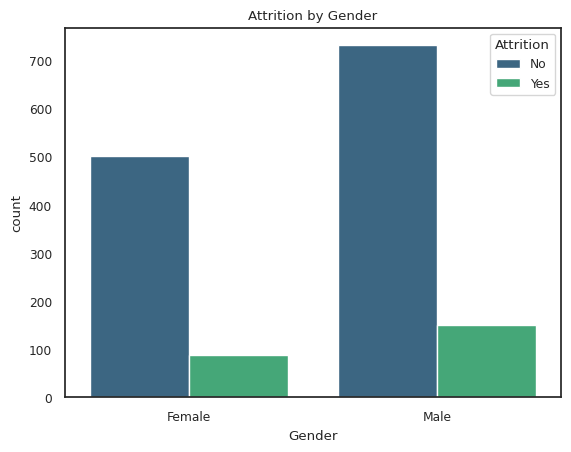

In [ ]:
# Gender
sns.countplot(data=df, x='Gender', hue='Attrition', palette='viridis')
plt.title('Attrition by Gender')
plt.show()

**Insight:** More no. of male employees who quit or left the company compared to female employees.

In [ ]:
# Education Distribution
fig4 = px.histogram(df, x='Education', color='Attrition', barmode='group', color_discrete_map={'Yes':'green','No':'darkblue'})
fig4.show()

**Insight:** Employees who has only a bachelors degree are highly prone to attrition, compared to others.

In [ ]:
# Monthly Income by Education Field
fig1 = px.bar(df.groupby("EducationField")["MonthlyIncome"].mean().reset_index().sort_values(by="MonthlyIncome", ascending=False),
              x="EducationField", y="MonthlyIncome", color="EducationField",
              title="Average Monthly Income by Education Field")
fig1.show()

**Insight:** Employees having Marketing or HR  degrees earn more than others (like Medical or Life Sciences).

In [ ]:
fig = px.histogram(
    df,
    x="MaritalStatus",
    color="OverTime",
    barmode="group",
    text_auto=True,
    title="OverTime Distribution by Marital Status",
    color_discrete_map={'Yes':'green','No':'darkblue'}
)

fig.update_layout(width=800, height=500, yaxis_title="Number of Employees")
fig.show()

**Insight:** Married employees did OverTime more than single or divorced employees.

In [ ]:
# Filter only employees doing overtime
df_ot = df[df['OverTime'] == 'Yes']

# Plot attrition by marital status
fig = px.histogram(
    df_ot,
    x="MaritalStatus",
    color="Attrition",
    barmode="group",
    text_auto=True,
    title="Attrition by Marital Status (Only Employees who did OverTime)",
    color_discrete_map={'Yes':'green','No':'darkblue'})

fig.update_layout(width=800, height=500, yaxis_title="Number of Employees")
fig.show()


**Insight:** Single employees doing overtime have higher attrition than Married or Divorced employees.

### Job-related

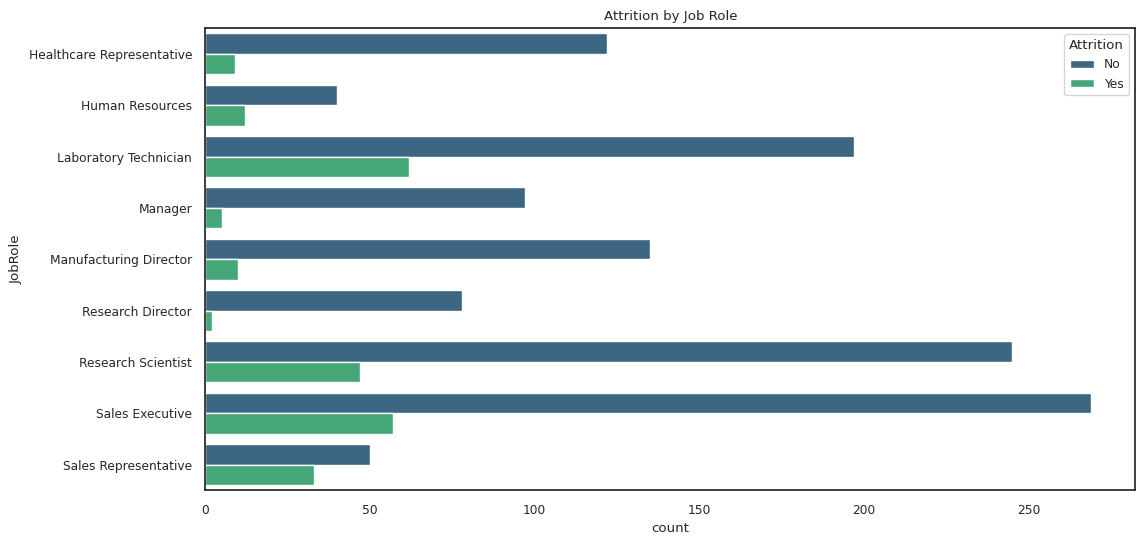

In [ ]:
# Job Role
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='JobRole', hue='Attrition', palette='viridis')
plt.title('Attrition by Job Role')
plt.show()

**Insight:** Job roles like 'Laboratory Technician', 'Sales Executive', 'Research Scientist' and 'Sales Representative' have higher attrition.

In [ ]:
# Attrition by Department
fig2 = px.histogram(df, x='Department', color='Attrition', barmode='group', color_discrete_map={'Yes':'green','No':'darkblue'})
fig2.show()

**Insight:** Research & Development (R&D) dept. and Sales dept. have higher attrition compared to HR dept.

In [ ]:
fig = px.histogram(df, x="BusinessTravel", color="Attrition", barmode="group",
                   title="Attrition by Business Travel",
                   color_discrete_map={'Yes':'green','No':'darkblue'})
fig.show()


**Insight:** Employees who travel rarely are more likely to retention than attrition.

**OverTime:** Whether the employee works overtime (Yes/No)

In [ ]:
# Overtime Impact
fig = px.histogram(df,
                   x='OverTime',
                   color='Attrition',
                   barmode='group',     # side-by-side bars
                   text_auto=True,      # show counts
                   color_discrete_map={'Yes':'green','No':'darkblue'})

fig.update_layout(
    title="Attrition by Overtime",
    xaxis_title="Overtime",
    yaxis_title="Number of Employees"
)

fig.show()

**Insight:** Employees doing overtime show higher attrition rates — possible burnout risk.

**Age:** Age of the employee

**MonthlyIncome:** Gross monthly income

**YearsAtCompany:** No. of Years spent in the company


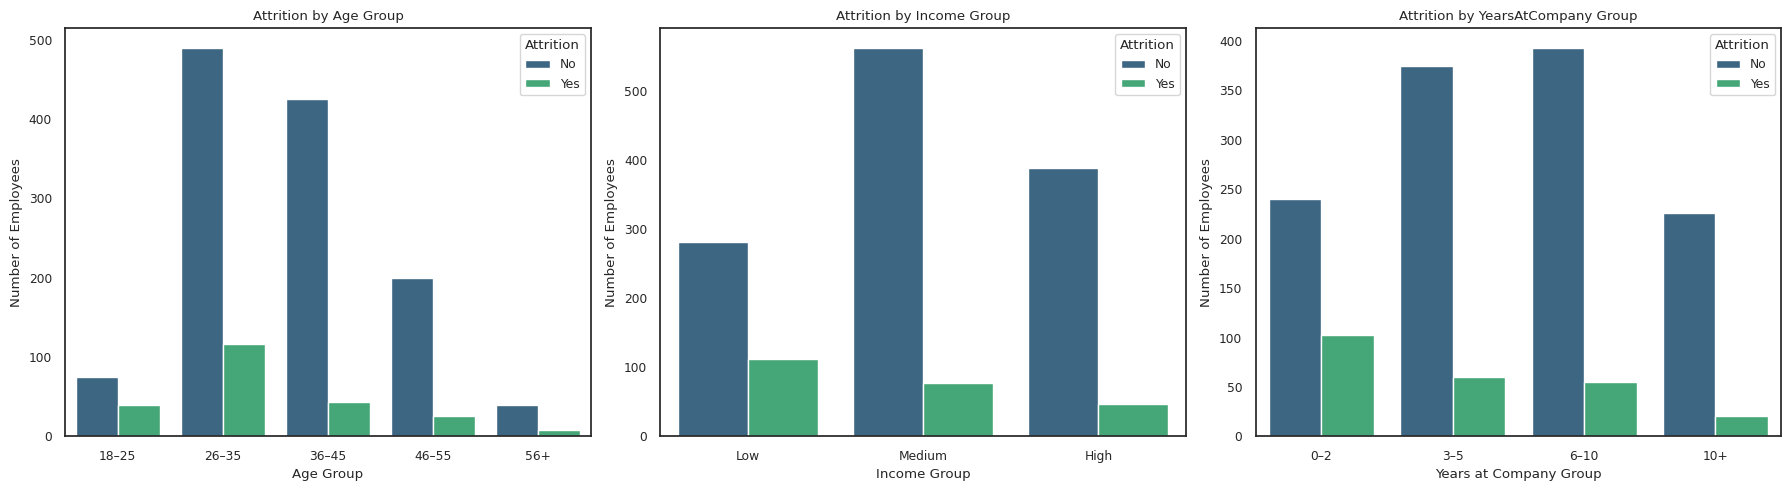

In [ ]:
# Attrition by Age Group, IncomeGroup, YearsAtCompanyGroup subplots

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Attrition by Age Group
sns.countplot(data=df, x='AgeGroup', hue='Attrition', palette='viridis', ax=axes[0])
axes[0].set_title("Attrition by Age Group")
axes[0].set_ylabel("Number of Employees")
axes[0].set_xlabel("Age Group")

# Attrition by Income Group
sns.countplot(data=df, x='IncomeGroup', hue='Attrition', palette='viridis', ax=axes[1])
axes[1].set_title("Attrition by Income Group")
axes[1].set_ylabel("Number of Employees")
axes[1].set_xlabel("Income Group")

# Attrition by YearsAtCompany Group
sns.countplot(data=df, x='YearsAtCompanyGroup', hue='Attrition', palette='viridis', ax=axes[2])
axes[2].set_title("Attrition by YearsAtCompany Group")
axes[2].set_ylabel("Number of Employees")
axes[2].set_xlabel("Years at Company Group")

# Adjust layout
plt.tight_layout()
plt.show()


**Insight:** Employees of age 26-35 have higher attrition rates. Employees who receive less salary (low range income) tend to quit or leave the company. Employees with 0-2 years experience at company have higher attrition risk. Employees with lower tenure have higher attrition.

In [ ]:
# Age vs Monthly Income by Attrition
fig4 = px.scatter(df, x='Age', y='MonthlyIncome', color='Attrition',  hover_data=['JobRole'],
                  color_discrete_map={'Yes':'green','No':'darkblue'},
                  title='Age vs Monthly Income by Attrition')
fig4.show()

**TotalWorkingYears:** Total years of professional experience


In [ ]:
fig = px.histogram(df,
                   x="TotalWorkingYears",
                   color="Attrition",
                   barmode="stack",   # stacked bars
                   nbins=15,          # number of bins
                   color_discrete_map={'Yes':'green','No':'darkblue'},
                   title="Stacked Histogram of Total Working Years by Attrition")

fig.update_layout(xaxis_title="Total Working Years",
                  yaxis_title="Number of Employees",
                  bargap=0.05)

fig.show()

**Insight:** Attrition is higher among early-career employees. It is more common in employees with less experience (0–10 years) compared to longer-tenured employees.

In [ ]:
# Bar chart: Attrition vs NumCompaniesWorked
fig = px.histogram(
    df,
    x="CompanyExperience",
    color="Attrition",
    barmode="group",
    title="Attrition by Company Experience",
    labels={"CompanyExperience": "Previous Company Experience"},
    color_discrete_map={'Yes':'green','No':'darkblue'}
)

fig.show()

**Insight:** Fresher employees have high attrition

In [ ]:
fig = px.histogram(df, x="YearsInCurrentRole", color="Attrition", nbins=10,
                   title="Attrition by Years in Current Role", color_discrete_map={'Yes':'green','No':'darkblue'})
fig.show()

**Insight:** Employees who spent **2-3 years in current role** are more likely to retention than attrition.

In [ ]:
fig = px.histogram(df, x="YearsSinceLastPromotion", color="Attrition", nbins=10,
                   title="Attrition by Years Since Last Promotion", color_discrete_map={'Yes':'green','No':'darkblue'})
fig.show()

**Insight:** Employees who are **recently promoted (0-1 years since last promotion)** are more likely to retention than attrition.

In [ ]:
fig = px.histogram(df, x="YearsWithCurrManager", color="Attrition", nbins=10,
                   title="Attrition by Years with Current Manager",
                   color_discrete_map={'Yes':'green','No':'darkblue'})
fig.show()

**Insight:** Employees who spent **0-1 years with current manager** have high attrition.

### Satisfaction & Engagement

**PerformanceRating:** Performance score (mostly 3 or 4)

In [ ]:
# Performance Rating Distribution
fig3 = px.histogram(df, x='PerformanceRating', color='Attrition', barmode='group',
                    color_discrete_map={'Yes':'green','No':'darkblue'})
fig3.show()

**Insight:** Most performance ratings are high (3 or 4), suggesting limited rating variance. Lower ratings correlate with higher attrition

**JobSatisfaction:** Job satisfaction level (1–4)

**WorkLifeBalance:** Work-life balance rating (1–4)

**EnvironmentSatisfaction:** Satisfaction with workplace environment (1–4)

**JobInvolvement:** Level of involvement in the job (1–4)

**RelationshipSatisfaction:** Satisfaction with coworkers (1–4)


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots (2 rows, 3 columns)
fig = make_subplots(rows=2, cols=3,
                    subplot_titles=("Job Satisfaction",
                                    "Work-Life Balance",
                                    "Environment Satisfaction",
                                    "Job Involvement",
                                    "Relationship Satisfaction"))

# Job Satisfaction
job = px.histogram(df, x='JobSatisfaction', color='Attrition', barmode='group', color_discrete_map={'Yes':'green','No':'darkblue'})
for trace in job['data']:
    fig.add_trace(trace, row=1, col=1)

# Work-Life Balance
wlb = px.histogram(df, x='WorkLifeBalance', color='Attrition', barmode='group', color_discrete_map={'Yes':'green','No':'darkblue'})
for trace in wlb['data']:
    fig.add_trace(trace, row=1, col=2)

# Environment Satisfaction
es = px.histogram(df, x='EnvironmentSatisfaction', color='Attrition', barmode='group',
                  color_discrete_map={'Yes':'green','No':'darkblue'})
for trace in es['data']:
    fig.add_trace(trace, row=1, col=3)

# Job Involvement
ji = px.histogram(df, x='JobInvolvement', color='Attrition', barmode='group', color_discrete_map={'Yes':'green','No':'darkblue'})
for trace in ji['data']:
    fig.add_trace(trace, row=2, col=1)

# Relationship Satisfaction
rs = px.histogram(df, x='RelationshipSatisfaction', color='Attrition', barmode='group',
                  color_discrete_map={'Yes':'green','No':'darkblue'})
for trace in rs['data']:
    fig.add_trace(trace, row=2, col=2)

# Layout
fig.update_layout(title_text="Employee Satisfaction Distributions by Attrition",
                  height=800, width=1100,
                  showlegend=False)

fig.show()

### Income & Compensation

In [ ]:
# Monthly Income by Attrition
fig3 = px.box(df, x="Attrition", y="MonthlyIncome", color="Attrition", color_discrete_map={'Yes':'green','No':'darkblue'})
fig3.show()

**Insight:** Employees leaving the company tend to have slightly lower median income of 3202 compared with median income of 5204 for employees who continue working at company.

In [ ]:
# Filter only employees doing overtime
df_ot = df[df['OverTime'] == 'Yes']

# Group employees by Salary Hike and OverTime
fig = px.histogram(df_ot, x="SalaryHikeGroup", color="Attrition", barmode="group",text_auto=True,
                   color_discrete_map={'Yes':'green','No':'darkblue'},
                   title="Attrition by Salary Hike (Only Employees who did OverTime)")

fig.update_layout(xaxis_title="Salary Hike Group",yaxis_title="Number of Employees",bargap=0.2)

fig.show()

**Insight:** Employees with low raises (11–15%) are leaving more than others.

### Correlation Analysis

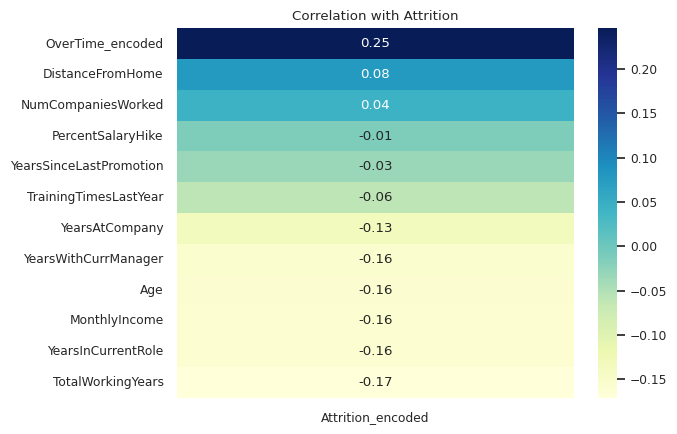

In [ ]:
# Create a heatmap of the correlations with the target column

from sklearn.preprocessing import LabelEncoder

# Encode 'Attrition' and 'OverTime' columns
le = LabelEncoder()
df['Attrition_encoded'] = le.fit_transform(df['Attrition'])
df['OverTime_encoded'] = le.fit_transform(df['OverTime'])

corr = df.corr(numeric_only=True)
target_corr = corr['Attrition_encoded'].drop('Attrition_encoded')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="YlGnBu", annot=True, fmt='.2f')
plt.title('Correlation with Attrition')
plt.show()

**Insight:**  Overtime, DistanceFromHome, and NumCompaniesWorked are strongly correlated with Attrition.

## Summary Report

**Answers to Key Questions:**

1. What is the overall attrition rate in the company?

  Attrition rate is **16.12%** (237 employees left).

2. Which job roles and departments have the highest attrition?

   Job roles like '**Laboratory Technician**', '**Sales Executive**', '**Research Scientist**' and '**Sales Representative**' have high attrition. **Research & Development (R&D)** dept. and **Sales** dept. have high attrition. Roles with more stress, client interaction, or repetitive work are more prone to attrition.

3. Is there a correlation between overtime and attrition?

  Overtime is one of the strongest drivers of attrition. Employees doing overtime have a much higher attrition rate compared to those with no overtime. Overtime is a strong factor in employee turnover — likely due to burnout or work-life imbalance.

4. Does job satisfaction or work-life balance influence attrition?

  Yes. Employees with low job satisfaction and poor work-life balance report higher attrition, even when salaries are competitive.

5. How do income, education, and experience affect attrition?

  Employees with less monthly income are leaving the company compared to employees who continue working at company. Attrition is higher among Bachelor and College level employees. Employees with 0–9 years of experience or short tenure at company are more likely to leave.


**Summary Insight & Recommendation:**

 Attrition is mostly among young, single, early-career employees without recent promotions, often in Sales/R&D roles, working overtime, with less salary and lower satisfaction rating. Training, career growth, and incentive programs may reduce attrition. Improving work-life balance, job satisfaction, and compensation can significantly reduce turnover.

Priscilla Philby Oommen  -- DA02